FoodHub Data Analysis

DATASET For you to load:

GitHub
https://github.com/CharSiu8/Datasets_for_Portfolio/blob/6896855164b29e860fe6a155364256db91b72809/FoodHub%20Data%20Copy.csv

or on Drive

https://drive.google.com/file/d/1NqRh6qbUQSAQ3IMJIsgng34nJM853JJc/view?usp=drive_link

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#connecting to google drive where my data set is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [3]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/MIT Applied AI and DataScience/datasets/foodhub_order.csv')

In [4]:
# Copying data to another variable to avoid any changes to the original data
# Intentionally saving it as dfcopy1 so that I don't accidentally use origional
# dfcopy1 represents the origional copy so that if i need to make other copies later involving removal to compare I do not change this copy
# dfcopy1 name allows me to keep better track of what each copy represents and what is in it
dfcopy1 = df.copy()

In [5]:
# Visualizing my Data
# When I forget a column name, I come back here
dfcopy1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [6]:
dfcopy1.shape

(1898, 9)

In [7]:
# Use info() to print a concise summary of the DataFrame
dfcopy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


int64, object, float64. I notice that some of the time columns are not in a date format and will probably want to adjust that later depending on the need


In [8]:
# Checking for missing values in the data

print("is null: ", dfcopy1.isnull().sum(), "\n", "\nEND OF ISNULL\n")
print("is na: ", dfcopy1.isna().sum())

is null:  order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64 
 
END OF ISNULL

is na:  order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [9]:
# Getting the summary statistics of the numerical data
# What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

dfcopy1['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


In [10]:
# Checking rating columns
dfcopy1['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:736 not rated. that is a large discrepancy.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

Data Exploration


In [11]:
#ORDER ID
dfcopy1['order_id'].nunique()

1898

In [12]:
# Customer ID
dfcopy1['customer_id'].nunique()

1200

In [13]:
# Restaurant Name
dfcopy1['restaurant_name'].nunique()

178

<Axes: xlabel='cuisine_type', ylabel='count'>

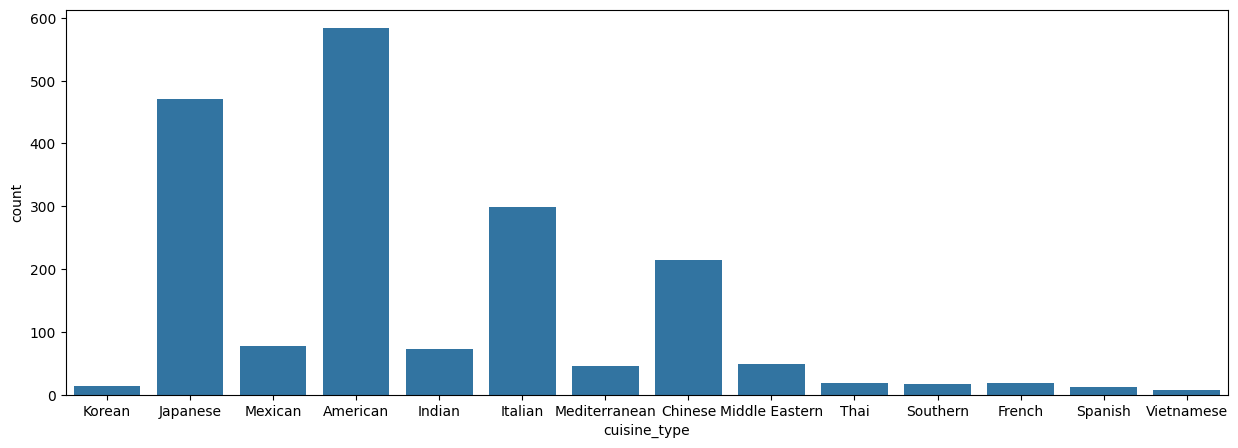

In [14]:
# Cuisine type
dfcopy1['cuisine_type'].nunique()
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

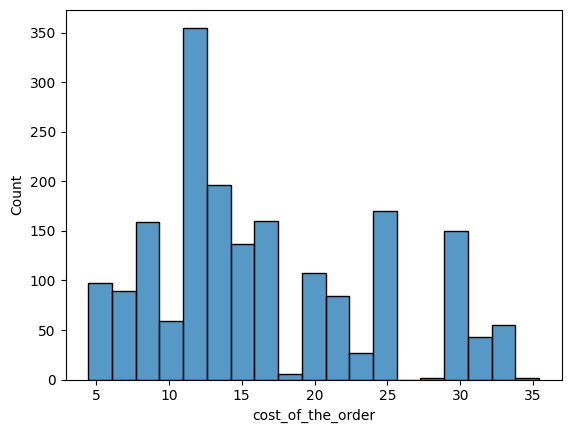

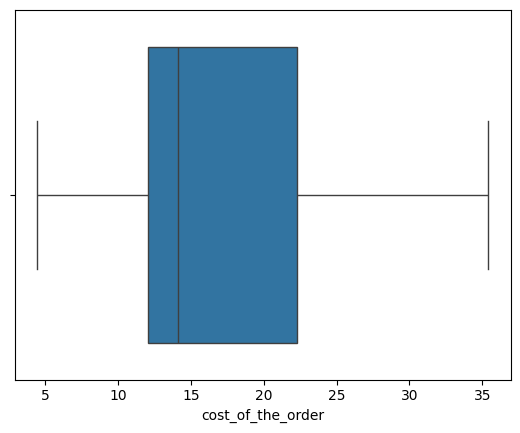

In [15]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

2


<Axes: xlabel='day_of_the_week', ylabel='count'>

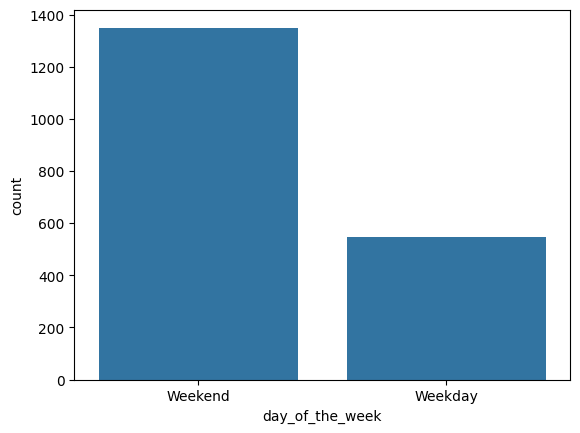

In [16]:
print(dfcopy1['day_of_the_week'].nunique())
sns.countplot(data = df, x = 'day_of_the_week')

4


,count
rating,
Not given,736
5,588
4,386
3,188


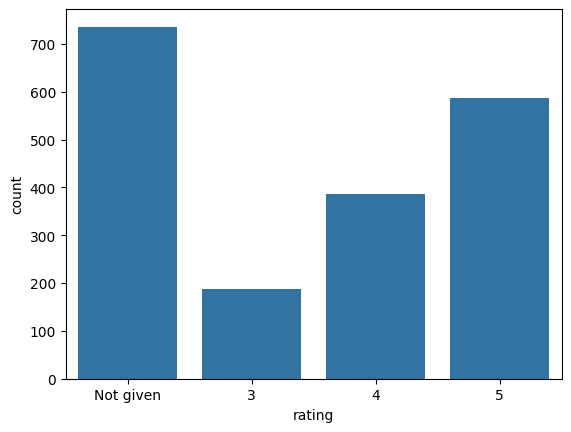

In [17]:
# Rating
print(df['rating'].nunique())

sns.countplot(data = df, x = 'rating', order=['Not given', 3, 4, 5])

# I also ordered it because i did not like the unordered output
# Noticed that there are no 1 or 2 star ratings. Verifying:
df['rating'].value_counts()
# ?? Why there are so many 'Not given' results. Was the customer satisfied or unsatisfied? Is this information missing somewhere? Why dont they rate?

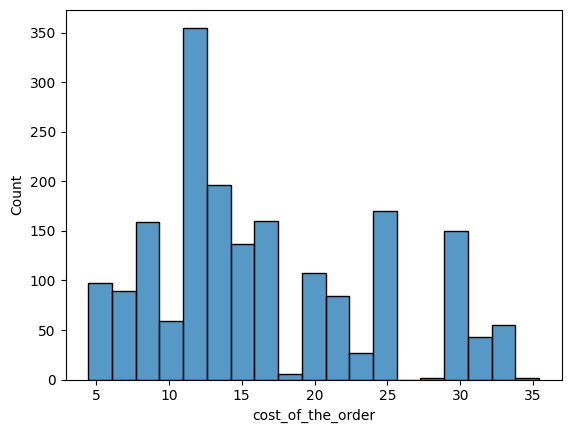

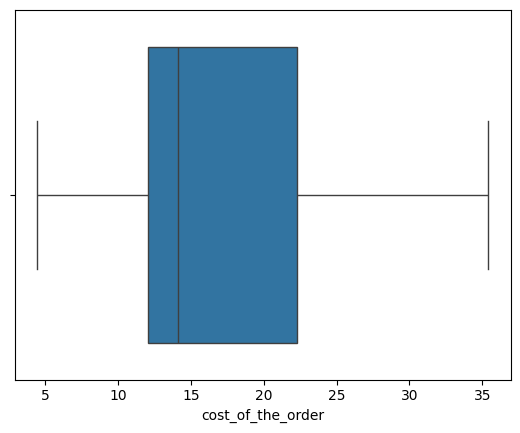

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


In [18]:
# histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

#boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()
#DESCRIBE Cost
dfcopy1['cost_of_the_order'].describe()


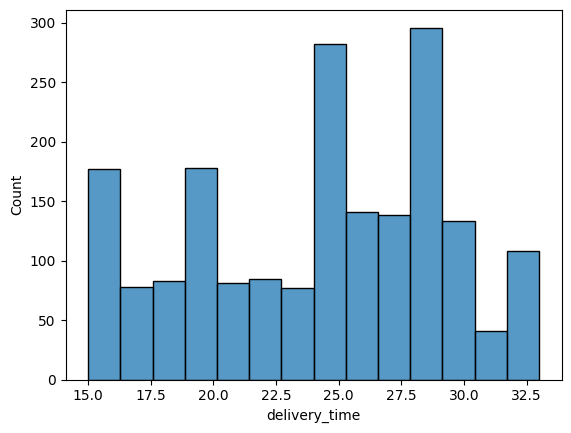

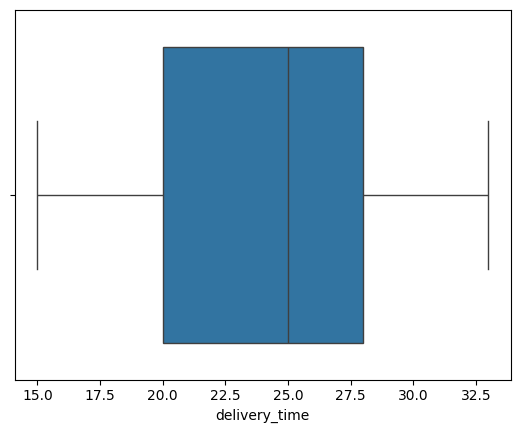

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


In [19]:
# histogram for the delivery time
sns.histplot(data=df,x='delivery_time')
plt.show()

# boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time')
plt.show()

#DESCRIBE delivery time
dfcopy1['cost_of_the_order'].describe()

What is popular?


In [20]:
#top 5 restaurants with highest number of orders
print("Calling with nlargest().")
print(df['restaurant_name'].value_counts().nlargest(5))

#Value Counts automatically ranks so you could also call value_counts and read the top 5:
df['restaurant_name'].value_counts()

#calling in multiple walls (using multiple functions per investigation can prevent misunderstandings later)

Calling with nlargest().
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


#### Observations: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried & Parm

In [21]:
# Get most popular cuisines on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


#### Observations: American, Japanese, Italian, Chinese, Mexican

In [22]:
# I noticed that the exact rank is maintained on WEEKDAYS up to Mediterranean [7,]
df_weekday = df[df['day_of_the_week'] == 'Weekday']
df_weekday['cuisine_type'].value_counts()

,count
cuisine_type,
American,169
Japanese,135
Italian,91
Chinese,52
Mexican,24
Indian,24
Middle Eastern,17
Mediterranean,14
Southern,6


How much is the customer willing to spend?

What percentage of the orders cost more than 20 dollars?

In [23]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

#total orders where cost > 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

#  % of orders >20$
percentage = (df_greater_than_20.shape[0] / dfcopy1.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


How long will the customer wait?


In [24]:
# call mean on subset
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


Situation: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [25]:
# counts of each customer_id
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


### Multivariate Analysis

/tmp/ipython-input-2158910523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = dfcopy1, palette = 'PuBu')


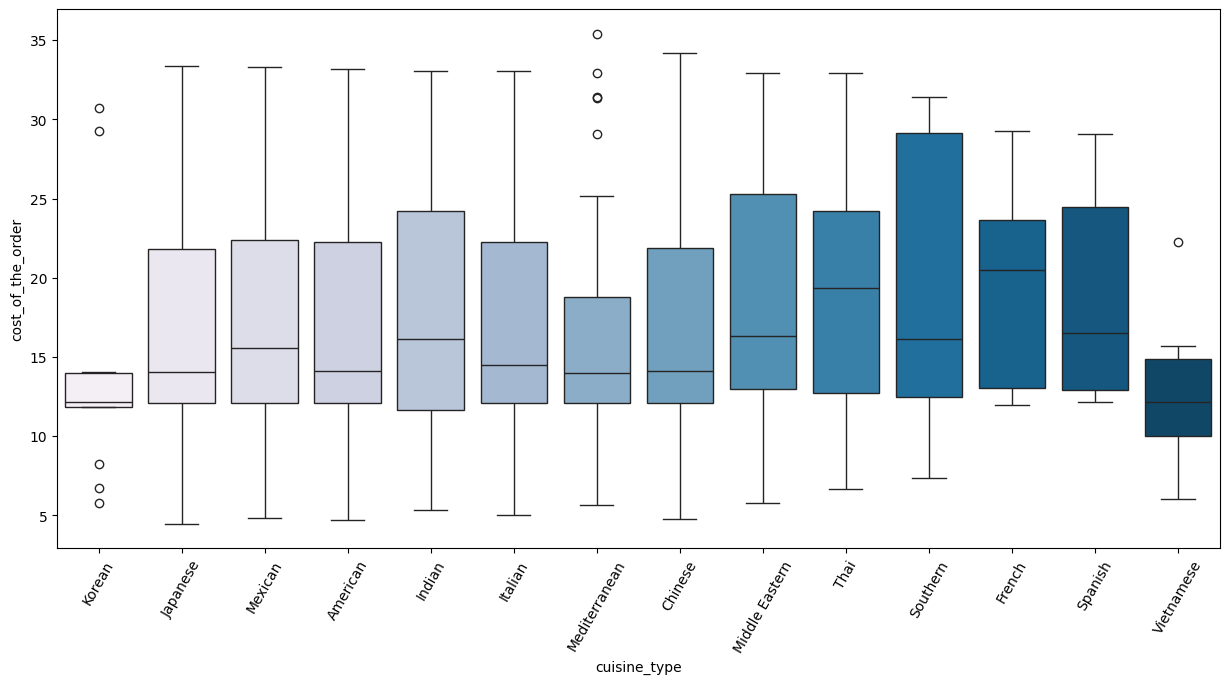

In [26]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = dfcopy1, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

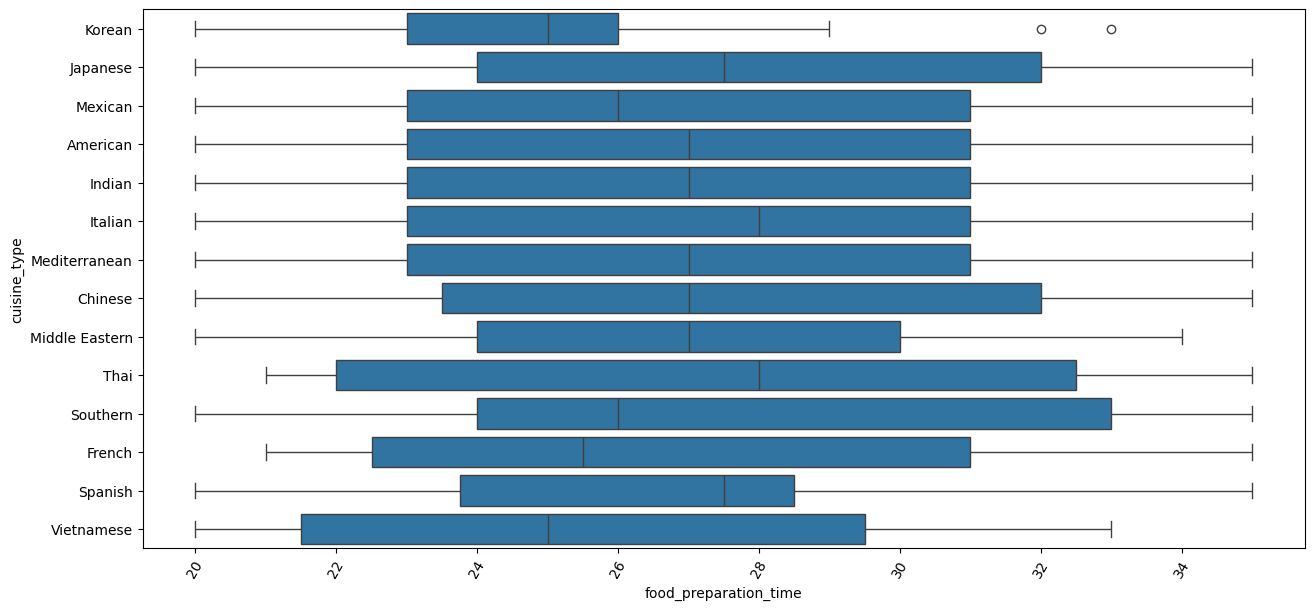

In [27]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "food_preparation_time", y = "cuisine_type", data = dfcopy1)
plt.xticks(rotation = 60)
plt.show()

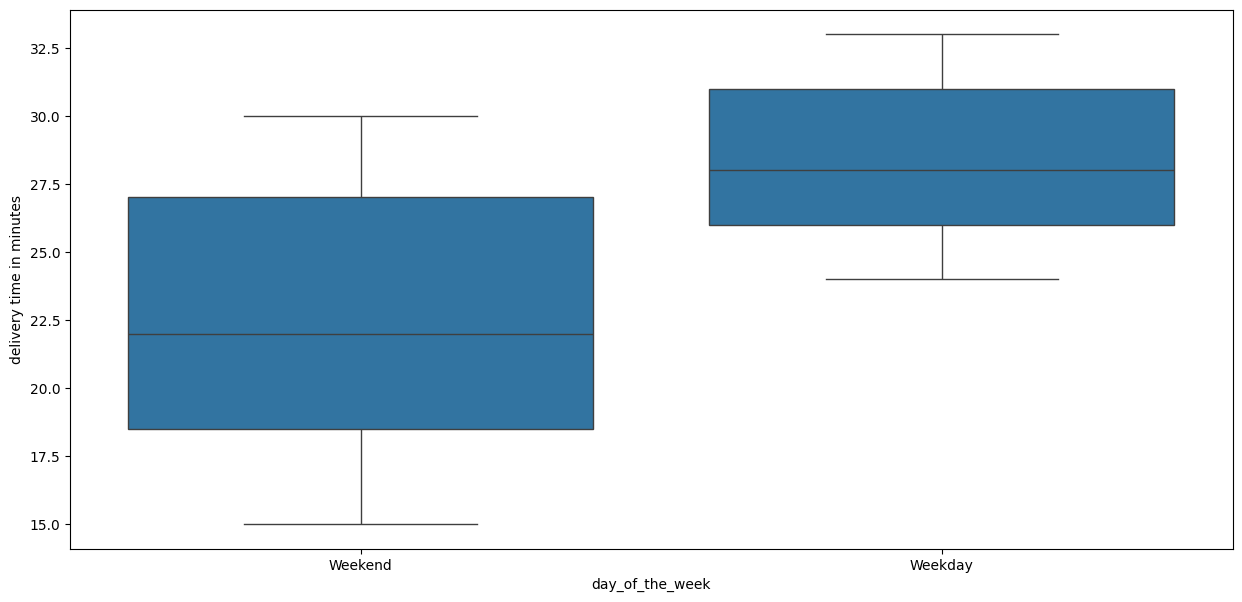

In [28]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=dfcopy1)
plt.ylabel('delivery time in minutes') # I was confused by delivery time showing as a float, when i expected a date for some reason. I added the label to clarify.
plt.show()

In [29]:
dfcopy1.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


#Showing Long tail


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


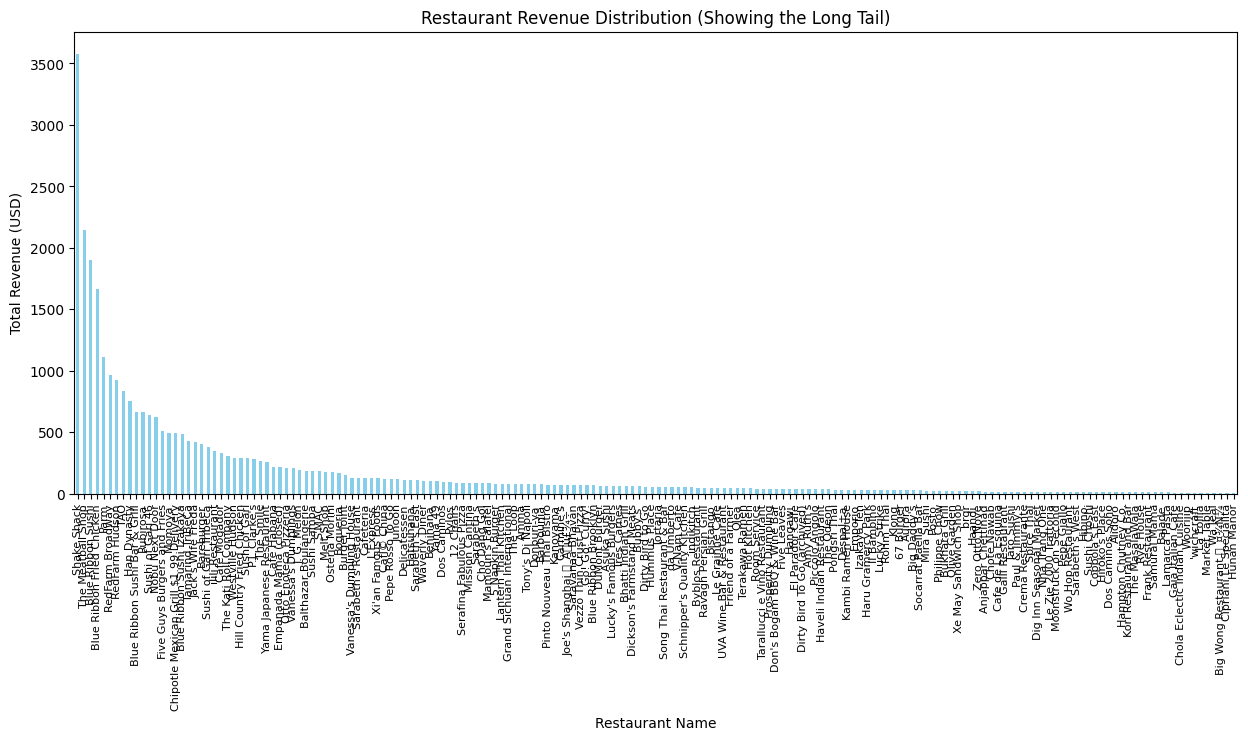

In [30]:
#Visualizing revenue generated
dfcopy1.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).plot(
    kind='bar',
    color='skyblue',
    figsize=(15, 6),
    title='Restaurant Revenue Distribution (Showing the Long Tail)'
)

# Set labels and rotation
plt.xlabel('Restaurant Name')
plt.ylabel('Total Revenue (USD)')

plt.xticks(rotation=90, fontsize=8);

plt.show()

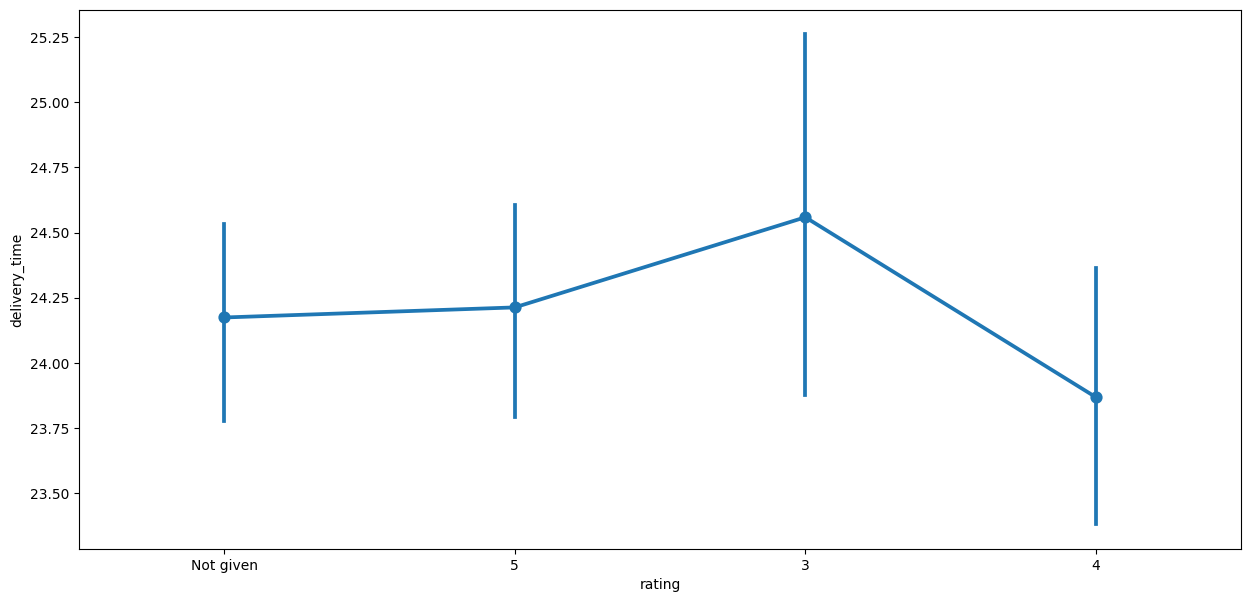

In [31]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = dfcopy1)
plt.show()

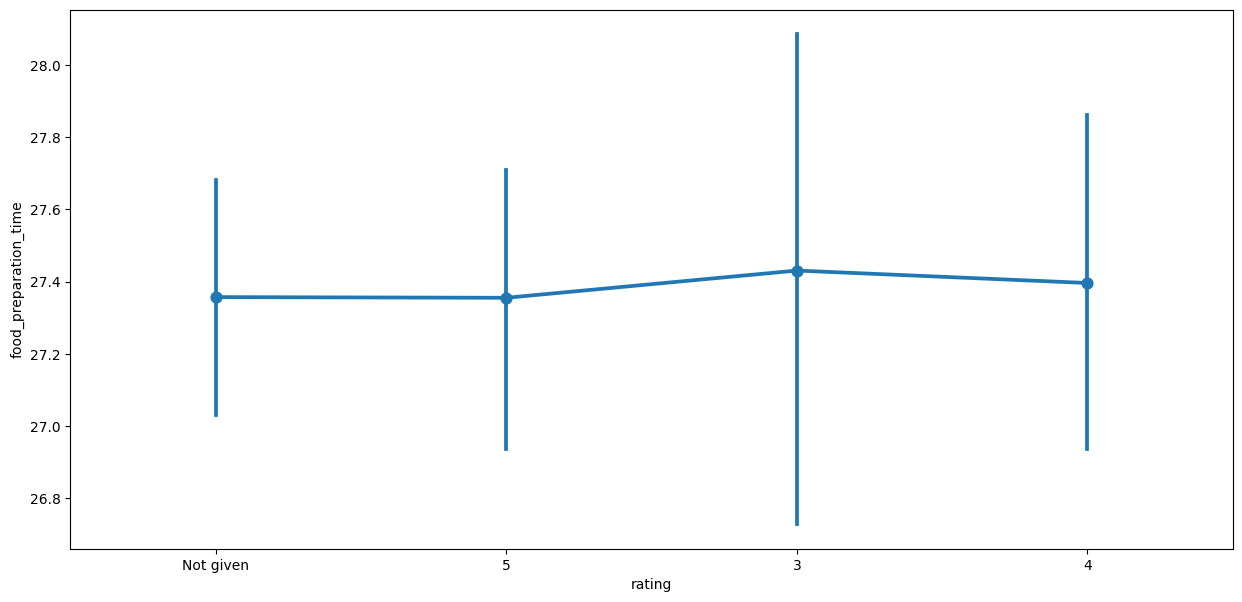

In [32]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=dfcopy1)
plt.show()

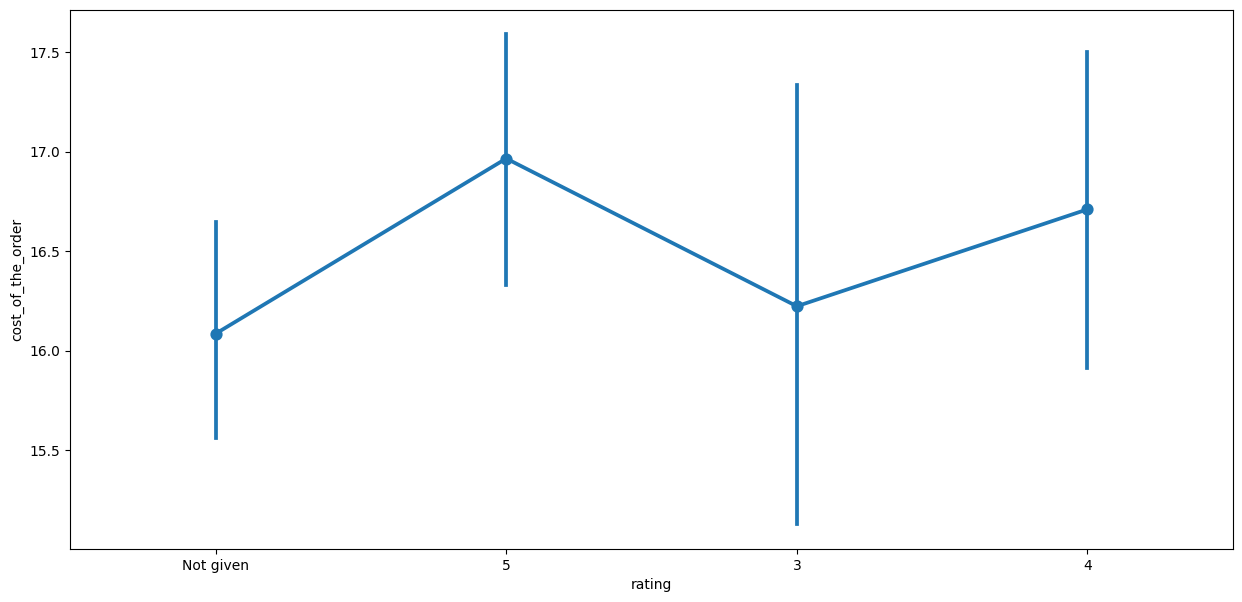

In [33]:
# Relationship between rating and cost of the order

plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=dfcopy1)
plt.show()

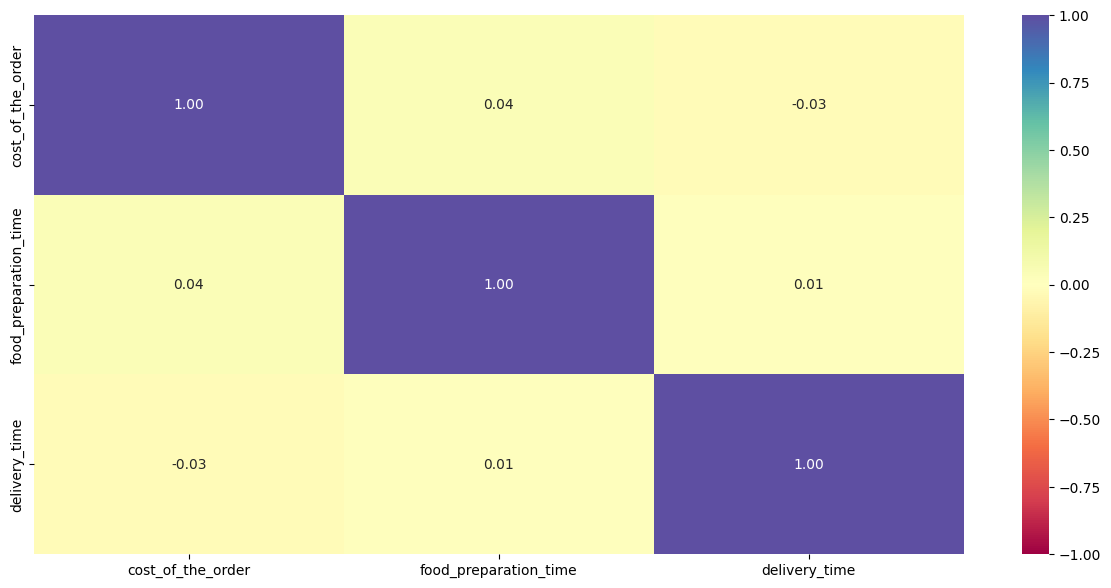

In [34]:
# heatmap showing correlation
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Situation: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.


In [35]:
# Make a new data frame to begin filtering the restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert the ratings from obj to int so they can be filtered
df_rated['rating'] = df_rated['rating'].astype('int')

# dataframe with restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

df_avg_rating = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

df_avg_rating.rename(columns={'rating': 'avg_rating'}, inplace=True)

df_rating_count_avg_rating_merged = pd.merge(df_avg_rating, df_rating_count, on='restaurant_name')

qualified_for_offer = restaurants_for_offer = df_rating_count_avg_rating_merged[
    (df_rating_count_avg_rating_merged['avg_rating'] > 4) &
    (df_rating_count_avg_rating_merged['rating'] > 50)
]

qualified_for_offer = qualified_for_offer.sort_values(by='avg_rating', ascending=False)
print("Restaurants that are qualified for the promotional offer:\n")
qualified_for_offer[['restaurant_name', 'avg_rating', 'rating']]

Restaurants that are qualified for the promotional offer:



,restaurant_name,avg_rating,rating
66,The Meatball Shop,4.511905,84
89,Blue Ribbon Fried Chicken,4.328125,64
93,Shake Shack,4.278195,133
101,Blue Ribbon Sushi,4.219178,73


#### Observations: clustered


Situation: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [36]:
# computing revenu
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

dfcopy1['Revenue'] = dfcopy1['cost_of_the_order'].apply(compute_rev)
dfcopy1.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [37]:
# Get the total revenue
total_rev = dfcopy1['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations: The net revenue is around 6166.3 dollars


Situation: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)


In [38]:
# Find total delivery time and add a new column
dfcopy1['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Get % of orders that take 60 min or more
df_delivery_greater_than_60 = dfcopy1[dfcopy1['total_time']>=60]

# Calculate percentage of such orders in the dataset
percentage = (df_delivery_greater_than_60.shape[0] / dfcopy1.shape[0]) * 100

print(" percentage of orders that have more than 60 minutes of total delivery time:", round(percentage, 2), '%')


 percentage of orders that have more than 60 minutes of total delivery time: 12.91 %


#### Observations:
percentage of orders that have more than 60 minutes of total delivery time: 12.91 %


Situation: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?


In [39]:
# weekday mean delivery time
print('WeekDAY mean delivery time: ',
      round(dfcopy1[dfcopy1['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# weekend mean delivery time

print('WeekEND mean delivery time: ',
      round(dfcopy1[dfcopy1['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




WeekDAY mean delivery time:  28 minutes
WeekEND mean delivery time:  22 minutes


MORE CODE FOR CONCLUSIONS AND RECOMMENDATIONS


In [40]:
# Orders per day on weekday vs orders per day on weekends
avg_order_per_weekday = dfcopy1['day_of_the_week'].value_counts()['Weekday']/5
avg_order_per_weekend = dfcopy1['day_of_the_week'].value_counts()['Weekend']/2

print("Average amount of orders per weekday: ", avg_order_per_weekday)
print("Average amount of orders per weekend day: ",avg_order_per_weekend)


Average amount of orders per weekday:  109.4
Average amount of orders per weekend day:  675.5


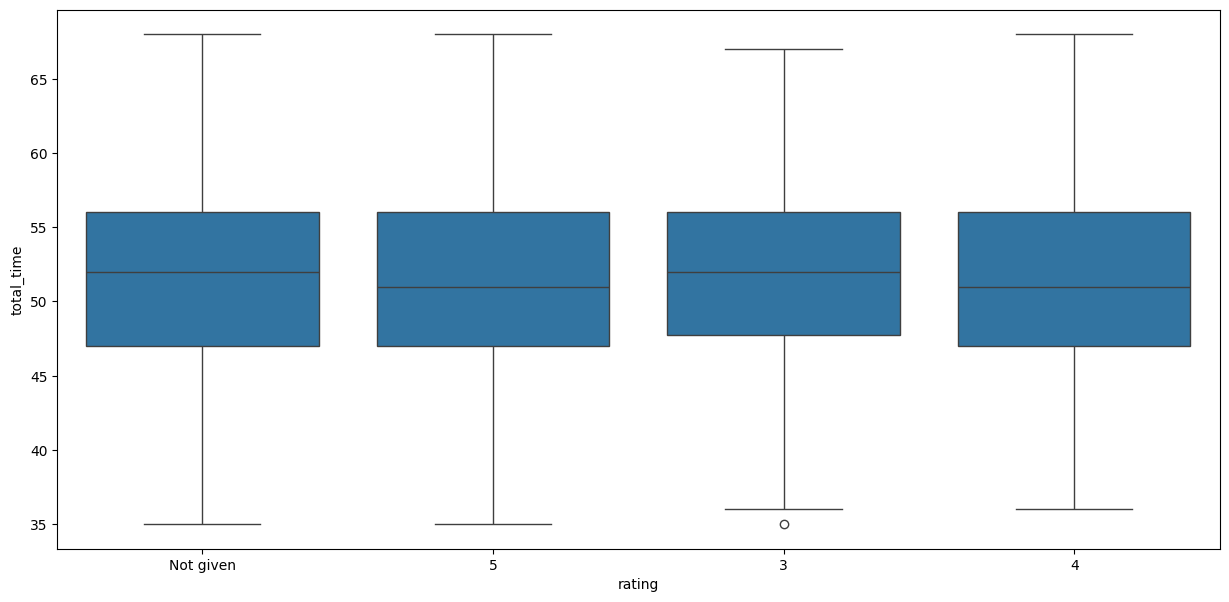

In [41]:
#Exploring total time vs rating
plt.figure(figsize=(15, 7))
sns.boxplot(x='rating', y='total_time', data=dfcopy1)
plt.show()
# Total time does not appear to affect rating, so rating is most likely related to other categories such as quality.

In [42]:
# Customer retention vs Whales
unique_orders_per_customer = dfcopy1.groupby('customer_id')['order_id'].nunique()
unique_orders_per_customer.describe()

,order_id
count,1200.000000
mean,1.581667
std,1.090560
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,13.000000


In [43]:
#Cuisine-Specific Performance
# Converting obj to numeric
dfcopy1['rating'] = pd.to_numeric(dfcopy1['rating'], errors='coerce')

dfcopy1['cost_of_the_order'] = pd.to_numeric(dfcopy1['cost_of_the_order'], errors='coerce')

# Grouping each cuisine to learn more about it
cuisine_performance = dfcopy1.groupby('cuisine_type').agg(
    avg_cost=('cost_of_the_order', 'mean'),
    avg_rating=('rating', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

cuisine_performance_sorted_by_rating = cuisine_performance.sort_values(
    by='avg_rating',
    ascending=False)

cuisine_performance_sorted_by_rating



,cuisine_type,avg_cost,avg_rating,total_orders
11,Spanish,18.994167,4.833333,12
12,Thai,19.207895,4.666667,19
3,Indian,16.919726,4.540000,73
8,Mexican,16.933117,4.416667,77
5,Japanese,16.304532,4.373626,470
4,Italian,16.418691,4.360465,298
1,Chinese,16.305209,4.338346,215
10,Southern,19.300588,4.307692,17
2,French,19.793889,4.300000,18
0,American,16.319829,4.298913,584


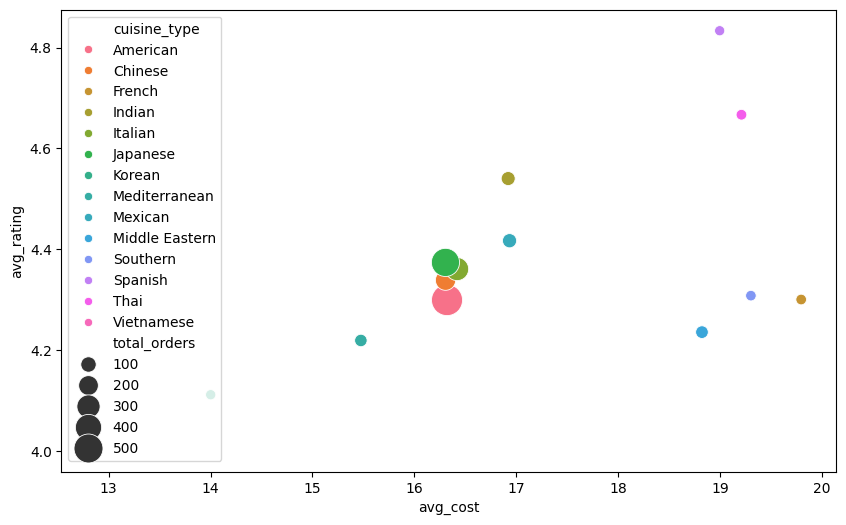

In [44]:
# Plotting
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=cuisine_performance,
    x='avg_cost',
    y='avg_rating',
    hue='cuisine_type', # Colors each point by cuisine
    size='total_orders', # Uses the volume of orders to set point size
    sizes=(50, 500)     # Controls the minimum and maximum size of the bubbles
)

plt.show()

### Conclusion and Recommendations


### Conclusions:


1

More business is done on the weekends

Average amount of orders per weekday:  109.4

Average amount of orders per weekend:  675.5

2

The company incentivizes restaurants that have better ratings by offering customers promotions for those restaurants, which allows the restaurant to grow in popularity. Thus, the company is bringing more business to the high performing restaurants, which in turn creates more orders and generates higher revenue for the company.

3

Offering more promotions for better-rated restaurants could also be inadvertently alienating the company from lower-performing restaurants

4

I wanted to do more research on total time vs rating

Is there a "tipping point" (e.g., 45 minutes) where ratings drop significantly? Business Value: If we find that orders taking >60 minutes always get <3 stars, the app can show a warning or offer an automatic discount for that specific order to maintain customer goodwill.

Conclusion : Total time does not appear to affect rating, so rating is most likely related to other categories such as quality.

5

customer retention vs whales
Observation to look for: What percentage of customers are "repeat customers"? Who are the top 5% of customers (the "whales") and what do they have in common?

Business Value: If 80% of revenue comes from 20% of customers, the marketing team should focus on a Loyalty Program rather than general discounts. This also allows us to examine churn.

Conclusion: unique_orders_per_customer.describe() shows that
this company has high churn and low retention!
Data shows that FoodHub is heavily reliant on customer acquisition rather than customer retention


6

Cuisine-Specific Performance

Observation: Which cuisines have the highest cost_of_the_order vs. the highest rating? For example, French food might be expensive but have lower ratings because it doesn't "travel well," whereas Pizza/Burgers might have high ratings and fast delivery times.

Business Value: This helps FoodHub decide which types of new restaurants to recruit. If Vietnamese food is high-rated but there are only two such restaurants, that is a clear market gap to fill.

Conclusion: American, Japanese, Italian and Chinese are all clustered in rating and cost, but higher ratings seem to be found in other cuisines  


Recommendations:
1

Cultivate weekday engagement

The weekends are already generating revenue, focus on consistently offering more promotions on the weekdays to boost user engagement on those days. Here is my practical recommendation for this:

The company should identify the time when people are most often to consider what they are having for supper. we should also analyze what time of day people most often realize they dont have a plan for supper yet or have forgotten to thaw the meat.

Lets say this time is 3pm.

The company should initiate a push notification at 3 pm on weekdays

The push notification should communicate to the user that if they order supper within the next two hours, to be delivered at a planned time, they will receive a discount. the discount expires after the window and making the user select a range of when they want it to be delivered allows restaurants advance notice of when to have orders ready. this will prevent restaurants from being overwhelmed on weekdays when they are normally less busy. The company should also provide advanced notice of this to the restaurants.

The company takes a small revenue hit because of the promotions, but can strategize in the following ways

run this promotion every weekday for two weeks so they have two weeks of data to sample from and can boost weekday user engagement for those two weeks

after two weeks, make the offers more sparse/thin. for example, lower the percentage of promotion or only offer the discount from certain cuisines or restaurants

2

Offer users a portion of their order refunded after placing a review.

This can allow the company to analyze lower rated restaurants by shifting promotions away from well performing, to less performing.

This can also help fill in many of the Not Givens in the Rating column, which could provide a lot of insight.

This tactic can also be employed to encourage users to try new cuisines

3

Offer a loyalty program We need to do something about customer retention. the average customer only orders 1.5 times. Offering a loyalty program could allow us to retain customers. I suggest a couple of ideas for a loyalty program first is the normal points system where after ordering so many times, they receive a discount second, I suggest allowing those who have only ordered 1-3 times to 'Freeze' promotions. For example, if the company sends out a today only promotion, the customer that has only ordered 1-2 times can freeze this promotion so they can use it on a different day. It would be important to set limits such as only being allowed to freeze one promotion and no longer offering this capability once they make 5 orders.

4

Restaurants with higher ratings generate more revenue for the company, so we should encourage users to try the highest rated restaurants despite their lower total sales. their lower sales are correlated to their higher price so if we offer discounts to the user on their price twice, the customer can try it twice and is more likely to pay for it at full price the third time they order.

5

My final recommendation is that Foodhub remembers that it is a 3rd party. We are not an essential part of a customer getting food in their mouths, we are a service to BOTH parties. If we focus our user engagement at the expense of our other party, the restaurants, we will lose both. If we offer a discount to the customer, it should come out of our pockets and not affect our financial transaction with the restaurant.


---